In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as md

dataset = pd.read_csv(
    '../models/coffee-shop/pastry inventory.csv',
    encoding='unicode_escape'
)

# create column of total made pastries of a given day
dataset['total_made'] = dataset["waste"] + dataset["quantity_sold"]
dataset['weekly'] = pd.to_datetime()

# print first 10 rows of dataset to better understand general data
dataset.head(10)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,total_made
0,3,4/1/2019,69,18,8,10,56%,18
1,3,4/1/2019,70,18,12,6,33%,18
2,3,4/1/2019,71,18,8,10,56%,18
3,3,4/1/2019,72,48,9,39,81%,48
4,3,4/1/2019,73,18,9,9,50%,18
5,3,4/2/2019,69,18,7,11,61%,18
6,3,4/2/2019,70,18,10,8,44%,18
7,3,4/2/2019,71,18,10,8,44%,18
8,3,4/2/2019,72,48,10,38,79%,48
9,3,4/2/2019,73,18,9,9,50%,18


In [30]:
# shows number of rows and columns
dataset.shape

(307, 8)

In [31]:
# gives general useful info about dataset such as null count and type of each column
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
 7   total_made        307 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 19.3+ KB


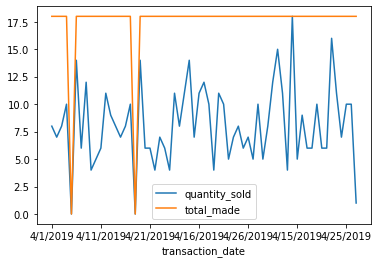

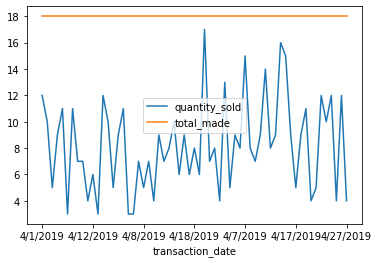

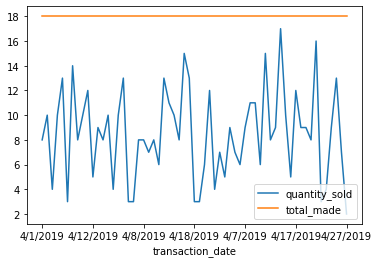

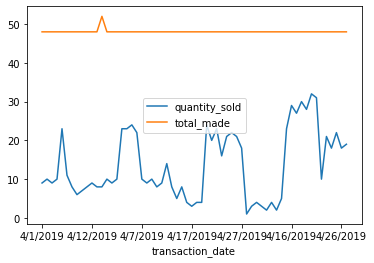

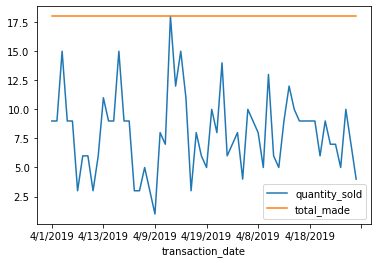

In [35]:
# shows number amount sold vs amount made for each product
for i in range(69, 74):
    product = dataset[dataset.product_id == i]
    product = product[product['transaction_time']]
    product.plot(x='transaction_date', y=['quantity_sold', 'total_made'])